In [1]:
#Importing the libraries required
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

from glob import glob
import matplotlib.pyplot as plt

2023-06-05 16:56:17.332742: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:56:17.422385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:56:17.423460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 16:56:18.836514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import PIL

In [70]:
#setting the Train dataset and test dataset path in the folder
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [71]:
#Setting the image size of all the input images supported for Resnet50 model
IMAGE_SIZE = [224, 224]

In [72]:
'''Importing the resnet model We do not include the top, 
because that is what we want to train ourselves. 
We only load convolutional weights that are trained on ImageNet data. 
After loading the model the layers are set “not trainable”, thus frozen.'''
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [73]:
resnet

In [74]:
for layer in resnet.layers:
    layer.trainable = False

In [75]:
#Getting the number of Output classes
folders = glob('Datasets/Train/*')

In [76]:
print(folders)

['Datasets/Train/mercedes', 'Datasets/Train/audi', 'Datasets/Train/lamborghini']


In [77]:
#Flattening the layers
x = Flatten()(resnet.output)

In [78]:
prediction = Dense(len(folders), activation='softmax')(x)

In [79]:
#Model creation  .Taking the resnet input shape and output as required to classify into 4 classes instead of 1000.
model = Model(inputs=resnet.input, outputs=prediction)

In [80]:
#Summary of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [81]:
#Compiling the model with cost and optimization method and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [82]:
#Using the ImageDataGenerator for data augmentation process in training images only (Not testing )
#Scaling of training and testing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [83]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [84]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [85]:
#Fitting the model 
with tf.device('/GPU:0'):
  r = model.fit(
      training_set,
      validation_data=test_set,
      epochs=50,
      steps_per_epoch=len(training_set),
      validation_steps=len(test_set)
    )

Epoch 1/50


2023-06-05 18:15:24.481594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 3.7173 - accuracy: 0.4688

2023-06-05 18:15:29.301710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 7s 4s/step - loss: 3.7173 - accuracy: 0.4688 - val_loss: 8.7435 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 7.8513 - accuracy: 0.3906 - val_loss: 4.8008 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 6.6532 - accuracy: 0.3281 - val_loss: 7.9479 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 5s 4s/step - loss: 5.8677 - accuracy: 0.3281 - val_loss: 2.7224 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 2.2932 - accuracy: 0.4375 - val_loss: 4.5204 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 5s 3s/step - loss: 4.9815 - accuracy: 0.3906 - val_loss: 4.0567 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 2.1077 - accuracy: 0.5312 - val_loss: 2.0303 - val_accuracy: 0.5172
Epoch 8/50
2/2 [==============================] - 5s

In [86]:
tf.test.is_built_with_cuda()

True

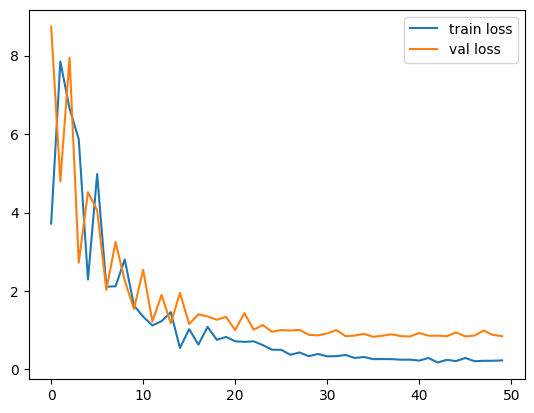

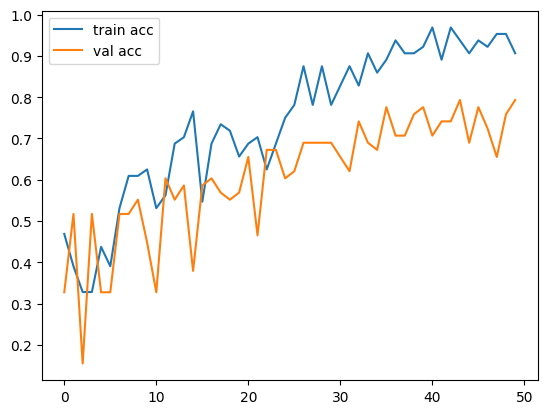

<Figure size 640x480 with 0 Axes>

In [87]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [88]:
import tensorflow as tf


In [89]:
tf.test.is_built_with_cuda()


True

In [90]:
tf.config.list_physical_devices(
    device_type=None
)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [91]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))


Num GPUs: 0


In [92]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [93]:
y_pred = model.predict(test_set)

2023-06-05 18:19:41.324974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 3s 1s/step


In [94]:
y_pred


array([[2.57777423e-02, 6.62620664e-01, 3.11601520e-01],
       [2.25092424e-03, 9.92682815e-01, 5.06626768e-03],
       [5.22074327e-02, 1.86990090e-02, 9.29093480e-01],
       [5.02151251e-01, 2.92085052e-01, 2.05763727e-01],
       [8.89748894e-03, 9.56167519e-01, 3.49349640e-02],
       [3.41366887e-01, 6.20356381e-01, 3.82767506e-02],
       [1.27023414e-01, 7.28930652e-01, 1.44046038e-01],
       [1.52305171e-01, 6.46686435e-01, 2.01008424e-01],
       [5.11203799e-03, 3.62520993e-01, 6.32366896e-01],
       [1.92766322e-03, 9.88394797e-01, 9.67764016e-03],
       [1.41378241e-02, 9.85197186e-01, 6.64884690e-04],
       [6.41017826e-03, 9.77682590e-01, 1.59071963e-02],
       [2.82024741e-02, 9.14880693e-01, 5.69167994e-02],
       [3.75505420e-04, 9.86738563e-01, 1.28860082e-02],
       [8.52763951e-02, 5.49103439e-01, 3.65620077e-01],
       [1.14051225e-02, 8.41646612e-01, 1.46948248e-01],
       [6.84558004e-02, 2.26716194e-02, 9.08872604e-01],
       [8.22634399e-01, 1.73914

In [95]:
print(y_pred.shape)

(58, 3)


In [96]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [97]:
y_pred


array([1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2])

In [98]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [99]:
model=load_model('model_resnet50.h5')

In [101]:
img=image.load_img('Datasets/Test/lamborghini/12.jpg',target_size=(224,224))


In [102]:
x=image.img_to_array(img)
x

array([[[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [19., 27., 30.],
        [19., 27., 30.],
        [20., 28., 31.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       ...,

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[11., 15., 18.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [66., 77., 83.],
        [64., 75., 81.],
        [59., 70., 76.]]

In [103]:
x.shape


(224, 224, 3)

In [104]:
x=x/255


In [105]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [106]:
model.predict(img_data)

1/1 [==============================] - 1s 658ms/step


array([[0.01090021, 0.02323685, 0.9658629 ]], dtype=float32)

In [107]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 60ms/step


In [108]:
a==2

array([ True])